In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Codenation Projeto/8_semana/train.csv')
teste = pd.read_csv('/content/drive/My Drive/Codenation Projeto/8_semana/test.csv')

In [ ]:
train.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

In [ ]:
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


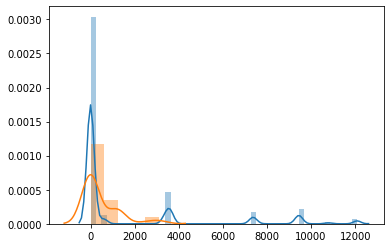

In [ ]:
sns.distplot(train.isna().sum())
sns.distplot(teste.isna().sum())

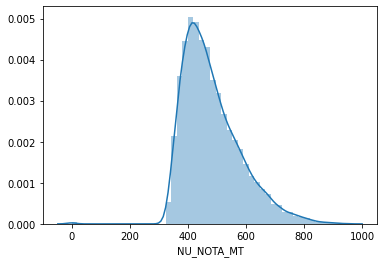

In [ ]:
sns.distplot(train.NU_NOTA_MT)

In [ ]:
train.fillna(0,inplace=True)
teste.fillna(0,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 166 entries, NU_INSCRICAO to Q050
dtypes: float64(28), int64(78), object(60)
memory usage: 17.4+ MB


In [ ]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4576 non-null   object 
 1   CO_UF_RESIDENCIA        4576 non-null   int64  
 2   SG_UF_RESIDENCIA        4576 non-null   object 
 3   NU_IDADE                4576 non-null   int64  
 4   TP_SEXO                 4576 non-null   object 
 5   TP_COR_RACA             4576 non-null   int64  
 6   TP_NACIONALIDADE        4576 non-null   int64  
 7   TP_ST_CONCLUSAO         4576 non-null   int64  
 8   TP_ANO_CONCLUIU         4576 non-null   int64  
 9   TP_ESCOLA               4576 non-null   int64  
 10  TP_ENSINO               4576 non-null   float64
 11  IN_TREINEIRO            4576 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  4576 non-null   float64
 13  IN_BAIXA_VISAO          4576 non-null   int64  
 14  IN_CEGUEIRA             4576 non-null   

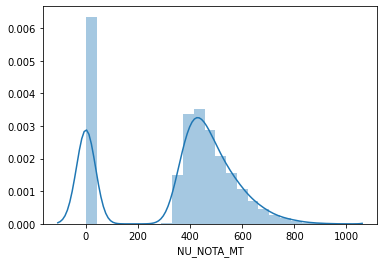

In [ ]:
sns.distplot(train.NU_NOTA_MT)

In [ ]:
columns_retira = ['NU_ANO','CO_MUNICIPIO_RESIDENCIA',	'CO_UF_RESIDENCIA',	'NU_IDADE'	,'TP_ESTADO_CIVIL'	,'TP_COR_RACA'	,'TP_NACIONALIDADE',
                   'CO_MUNICIPIO_NASCIMENTO',	'CO_UF_NASCIMENTO',	'TP_ST_CONCLUSAO',	'TP_ANO_CONCLUIU','IN_TREINEIRO'	,'CO_ESCOLA',
                   'CO_MUNICIPIO_ESC'	,'CO_UF_ESC','IN_BAIXA_VISAO',	'IN_CEGUEIRA',	'IN_SURDEZ'	,'IN_DEFICIENCIA_AUDITIVA',	
                   'IN_SURDO_CEGUEIRA',	'IN_DEFICIENCIA_FISICA',	'IN_DEFICIENCIA_MENTAL',	
                    'IN_DEFICIT_ATENCAO'	,'IN_DISLEXIA'	,'IN_DISCALCULIA'	,'IN_AUTISMO'	,'IN_VISAO_MONOCULAR',	'IN_OUTRA_DEF',
                   'IN_BRAILLE',	'IN_AMPLIADA_24',	'IN_AMPLIADA_18'	,'IN_LEDOR'	,'IN_ACESSO'	,'IN_TRANSCRICAO'	,'IN_LIBRAS',	'IN_LEITURA_LABIAL',	
                   'IN_MESA_CADEIRA_RODAS',	'IN_MESA_CADEIRA_SEPARADA'	,'IN_APOIO_PERNA'	,'IN_GUIA_INTERPRETE',	'IN_MACA'	,'IN_COMPUTADOR',	
                   'IN_CADEIRA_ESPECIAL',	'IN_CADEIRA_CANHOTO',	'IN_CADEIRA_ACOLCHOADA',	'IN_PROVA_DEITADO',	'IN_MOBILIARIO_OBESO',	
                   'IN_LAMINA_OVERLAY',	'IN_PROTETOR_AURICULAR',	'IN_MEDIDOR_GLICOSE',	'IN_MAQUINA_BRAILE',	'IN_SOROBAN',	'IN_MARCA_PASSO',	
                   'IN_SONDA',	'IN_MEDICAMENTOS',	'IN_SALA_INDIVIDUAL',	'IN_SALA_ESPECIAL',	'IN_SALA_ACOMPANHANTE',	'IN_MOBILIARIO_ESPECIFICO',	
                   'IN_MATERIAL_ESPECIFICO',	'IN_NOME_SOCIAL',	'IN_CERTIFICADO','IN_GESTANTE','IN_IDOSO',	'IN_ESTUDA_CLASSE_HOSPITALAR',
                   'TP_PRESENCA_CN',	'TP_PRESENCA_CH',	'TP_PRESENCA_LC',	'TP_PRESENCA_MT','IN_SABATISTA',	'IN_LACTANTE'	,'IN_SEM_RECURSO',	
                    'CO_UF_ENTIDADE_CERTIFICACAO'	,'CO_MUNICIPIO_PROVA'	,'CO_UF_PROVA','TP_STATUS_REDACAO',
                   	'Q005','Q030',	'Q031',	'Q032',	'Q033',	'Q034','Q036',	'Q037',	'Q038', 'Q039'	,'Q040'	,'Q041']
train1 = train.drop(columns=columns_retira)

In [ ]:
train1.corr()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,NaN,1.000000,0.999865,-0.002296,0.020035,-0.236178,0.009710,0.699425,0.699691,0.025402,-0.032664,0.041738,0.030402,-0.035317,0.211920,0.212428,0.212707,0.042757,0.022887,0.030061,0.001188,NaN,-0.010872,0.012790,NaN,-0.001965,0.000846,0.012051,0.003969,0.001007,NaN,-0.007271,0.008818,-0.030268,-0.009254,0.000398,-0.014474,NaN,-0.003578,NaN,0.006602,-0.009777,0.013384,-0.005041,0.008562,-0.002133,-0.003706,-0.004674,-0.011169,-0.008567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003576,NaN,NaN,NaN,NaN,0.017423,NaN,0.003713,NaN,NaN,NaN,0.008911,-0.003259,0.108598,0.982100,0.981955,-0.035441,-0.035441,-0.034269,-0.034269,-0.011635,-0.004253,-0.005219,0.003070,-0.098682,-0.032997,-0.004669,-0.008499,-0.005731,-0.002859,0.004680,-0.003757,-0.117804,0.100934,0.053147,0.132266,0.142500,0.118919,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,0.098497
CO_UF_RESIDENCIA,NaN,0.999865,1.000000,-0.002017,0.020157,-0.234786,0.009433,0.699058,0.699491,0.025822,-0.032538,0.041406,0.030240,-0.034944,0.211696,0.212166,0.212498,0.042399,0.022786,0.029859,0.001360,NaN,-0.010716,0.013035,NaN,-0.001914,0.000934,0.011867,0.003689,0.001093,NaN,-0.007216,0.008782,-0.029933,-0.009503,0.000516,-0.014365,NaN,-0.003675,NaN,0.006819,-0.009685,0.013546,-0.005045,0.008746,-0.001915,-0.003603,-0.004737,-0.011502,-0.008629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003689,NaN,NaN,NaN,NaN,0.017536,NaN,0.003689,NaN,NaN,NaN,0.008251,-0.002454,0.109439,0.981938,0.982035,-0.035438,-0.035438,-0.034287,-0.034287,-0.011900,-0.004580,-0.005603,0.002613,-0.096473,-0.032826,-0.004980,-0.008865,-0.006154,-0.003237,0.004180,-0.004166,-0.117288,0.100579,0.053284,0.131821,0.141990,0.118389,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,0.098595
NU_IDADE,NaN,-0.002296,-0.002017,1.000000,0.508125,0.009675,-0.017713,-0.013493,-0.013146,-0.253403,0.681435,-0.296328,-0.193546,-0.295091,-0.289560,-0.289524,-0.289393,-0.295386,-0.300014,-0.306167,0.027907,NaN,0.006520,0.011380,NaN,0.036361,0.000696,-0.0062

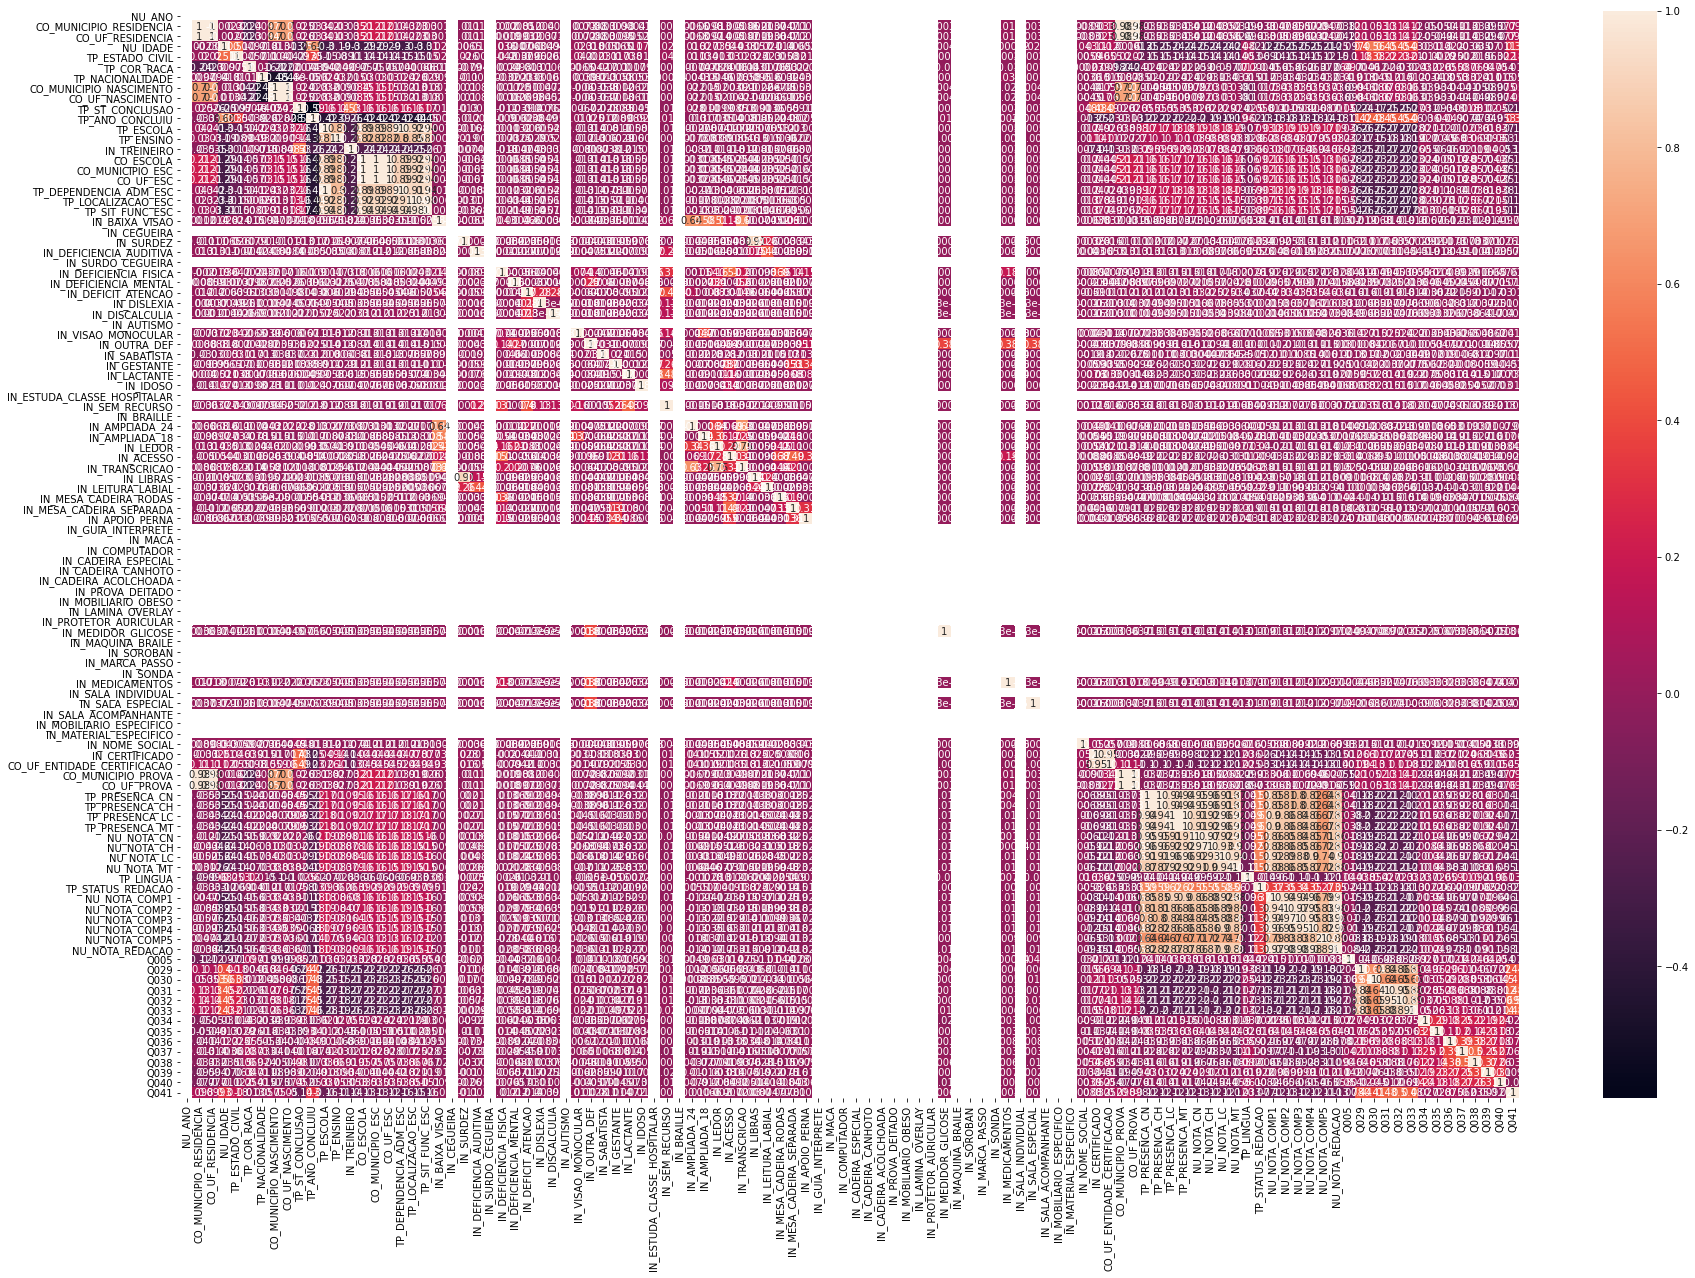

In [13]:
plt.figure(figsize=(30,20))
corr = train1.corr()
sns.heatmap(corr,annot=True)

In [14]:
labels = ['TP_ESCOLA',	'TP_ENSINO'	,'TP_DEPENDENCIA_ADM_ESC',	
           	'NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',
           'TP_LINGUA',	'NU_NOTA_COMP1',	'NU_NOTA_COMP2',	'NU_NOTA_COMP3',	'NU_NOTA_COMP4',
           'NU_NOTA_COMP5',	'NU_NOTA_REDACAO']


In [15]:
X_train = train[labels]
Y_train = train['NU_NOTA_MT']
X_teste = teste[labels]

In [16]:
from sklearn.preprocessing import StandardScaler, Normalizer

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_teste = sc.transform(X_teste)


In [17]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_teste)
#print("pelo linear regression: o R2: ",metrics.r2_score(Y,y_pred))
#print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y,y_pred)))

In [18]:
lr.score(X_train,Y_train)

0.9032852780146526

In [19]:
#answer = pd.DataFrame()
#answer['NU_INSCRICAO'] = teste['NU_INSCRICAO']
#answer['NU_NOTA_MT'] = y_pred

#answer.to_csv('/content/drive/My Drive/Codenation Projeto/8_semana/answer.csv', index=False,float_format= '%.1f')

In [20]:
parametros = {"max_depth": [5,6], "n_estimators" : [10,100],"random_state": [False,True],
              "min_samples_leaf": [2,3],
                      "min_samples_split": [2], "verbose": [True,False]}
busca = GridSearchCV(estimator=RandomForestRegressor(),param_grid=parametros,scoring = 'r2')
busca.fit(X_train,Y_train)
best_params = busca.best_params_
print(best_params)
melhor_modelo = busca.best_estimator_
score = busca.best_score_
print(score.round(4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': False, 'verbose': True}
0.9223


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


In [21]:
rf = RandomForestRegressor(max_depth = 6, min_samples_leaf = 3, min_samples_split = 2,
                           n_estimators = 100, random_state = False, verbose = True)

In [22]:
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_teste)
rf.score(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.926287098115269

In [23]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = teste['NU_INSCRICAO']
answer['NU_NOTA_MT'] = y_pred_rf

answer.to_csv('/content/drive/My Drive/Codenation Projeto/8_semana/answer.csv', index=False,float_format= '%.1f')